In [1]:
%run eval_nonstat.py

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/6000 [00:00<?, ?it/s]

In [2]:
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = "retina"

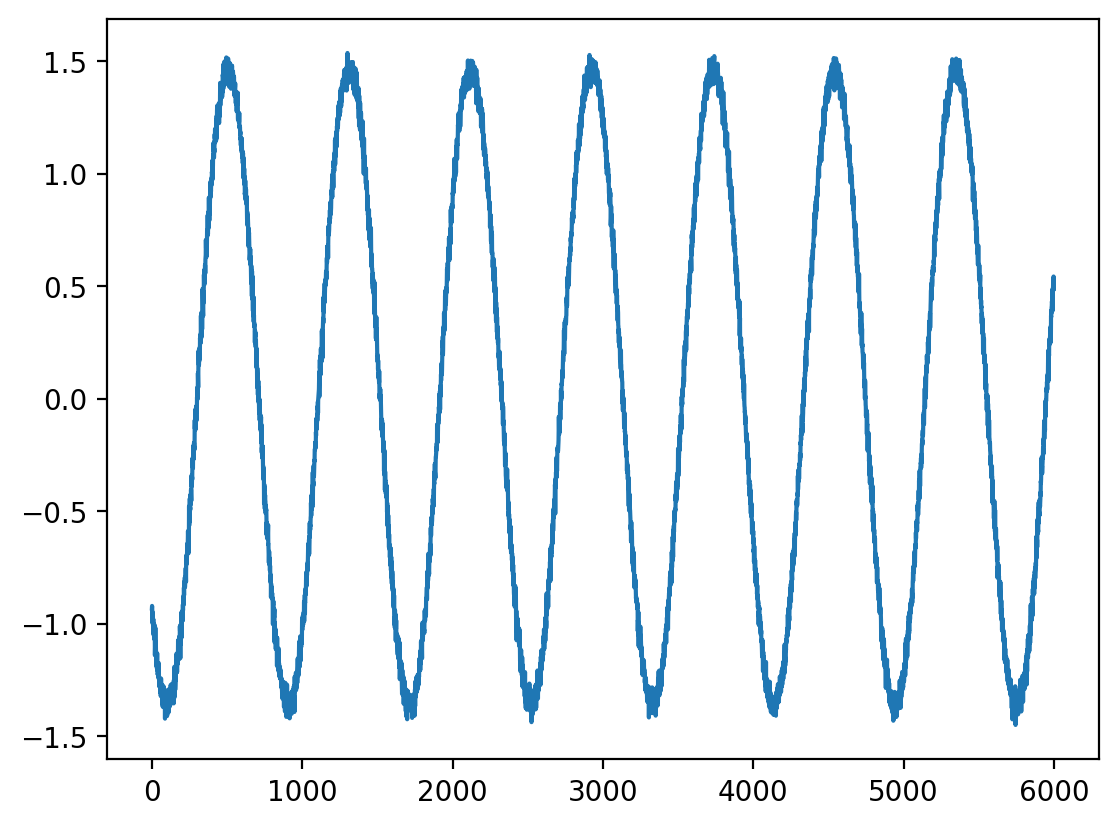

In [6]:
plt.plot(signal_train)

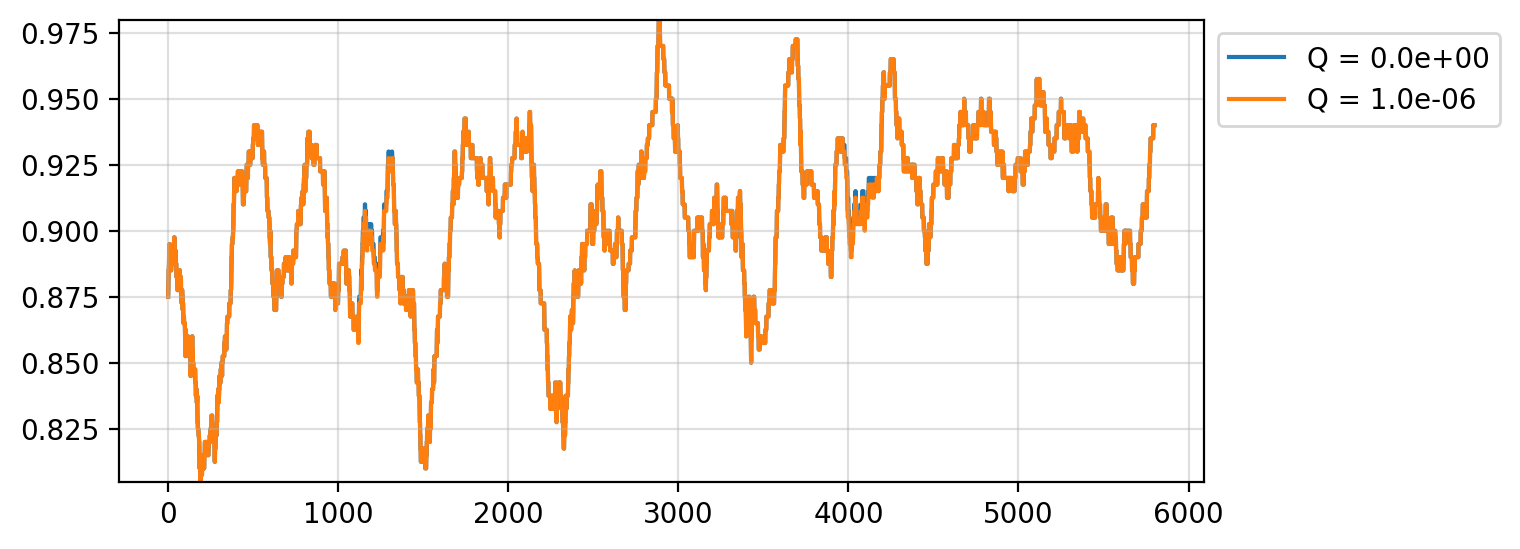

In [7]:
ksize = 200
keyv = "osa-error"

fig, ax = plt.subplots(figsize=(7, 3))
for outputs_lofi in outputs:
    # dweights = 1 - outputs_lofi["dynamics_shift"]
    
    dweights = outputs_lofi["dynamics_shift"]
    label = f"Q = {dweights:0.1e}"
    
    kernel = np.ones(ksize) / ksize
    err = outputs_lofi[keyv]
    err_smooth = np.convolve(err, kernel, mode="valid")
    
    ax.plot(err_smooth, label=label, zorder=0)

vmax = np.quantile(err_smooth, 1.0)
vmin = np.quantile(err_smooth, 0.0)
ax.set_ylim(vmin, vmax)
ax.legend(bbox_to_anchor=(1,1))
ax.grid(alpha=0.4)

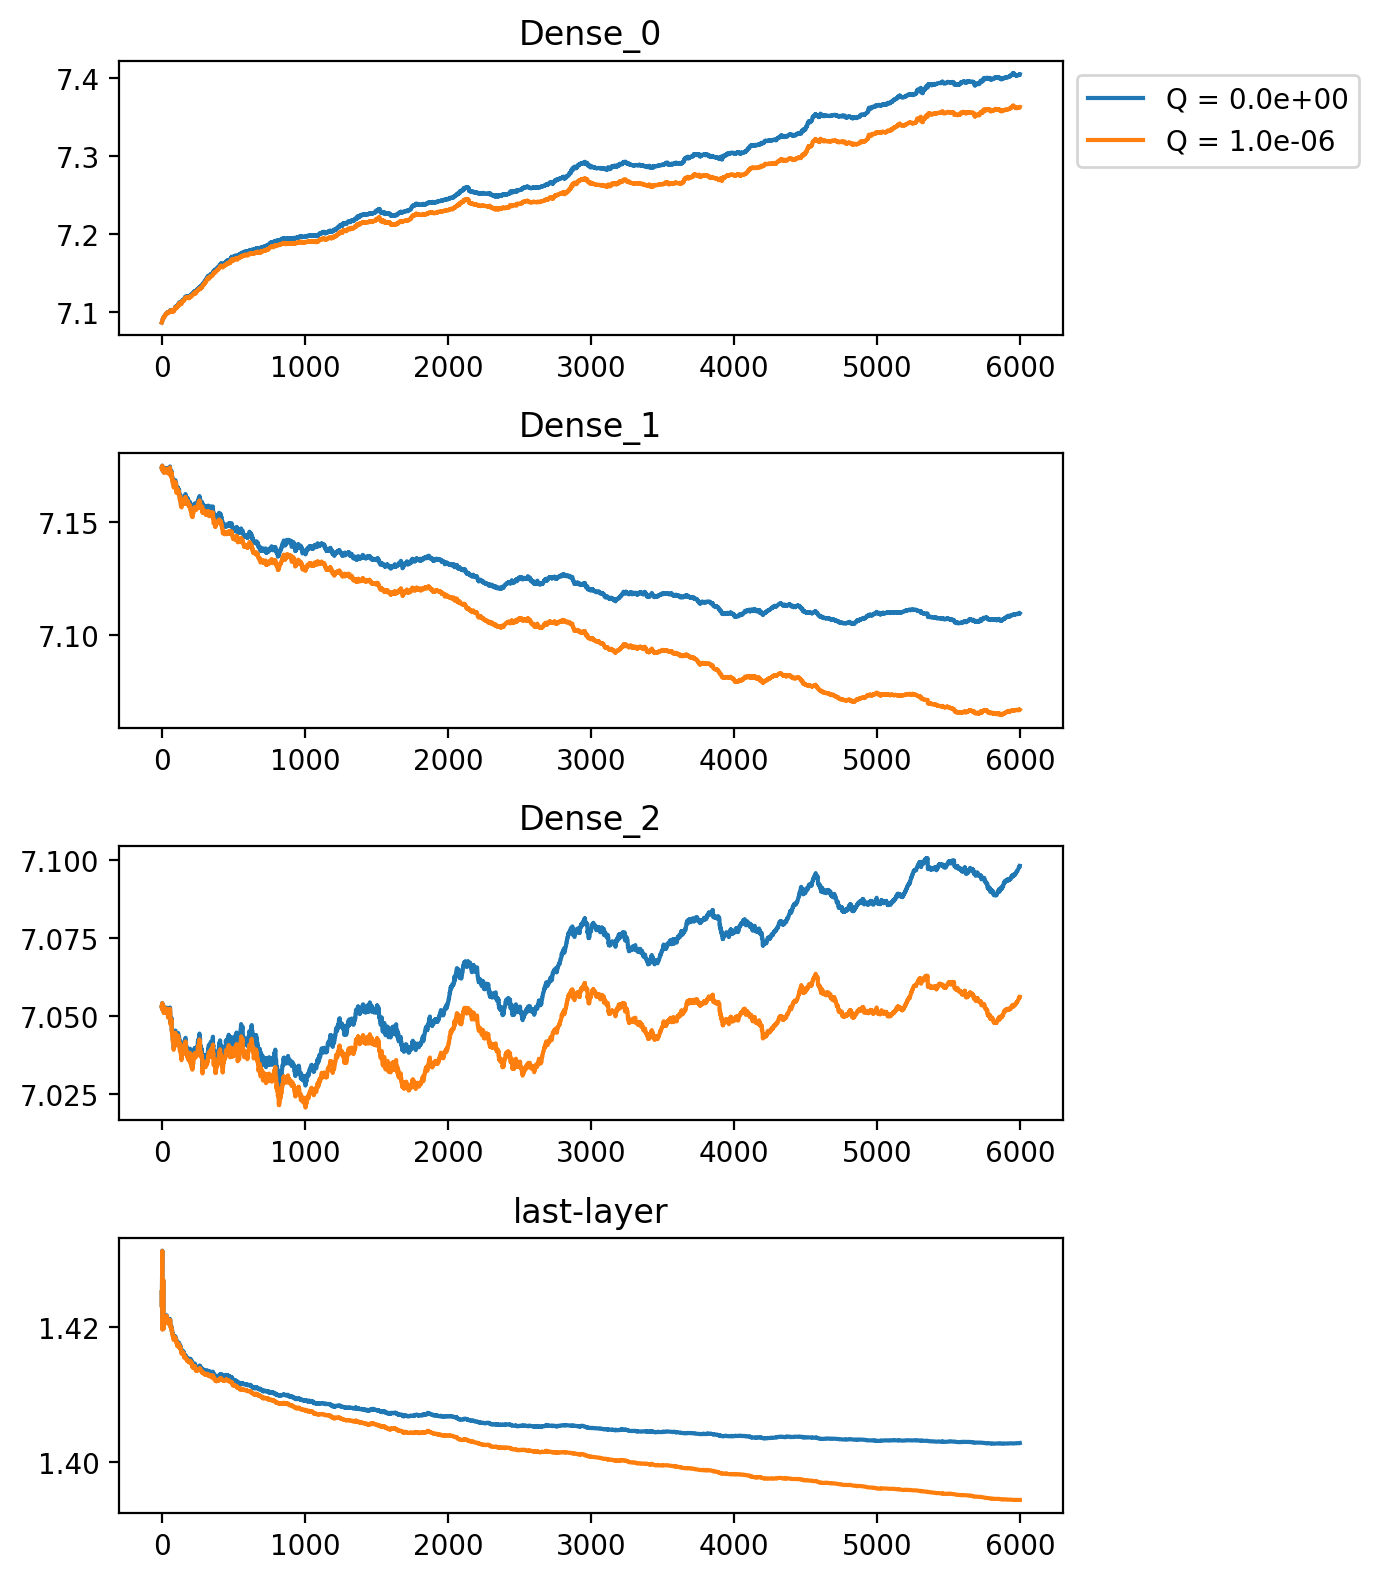

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(7, 8))


for outputs_lofi in outputs:
    # dweights = 1 - outputs_lofi["dynamics_shift"]
    # label = f"gamma = {dweights:0.6f}"
    
    dweights = outputs_lofi["dynamics_shift"]
    label = f"Q = {dweights:0.1e}"
    
    magnitude_hist = outputs_lofi["params_magnitude"]["params"]
    for ax, key in zip(axs, magnitude_hist):
        ax.plot(magnitude_hist[key], label=label)

for ax, label in zip(axs, magnitude_hist):
    ax.set_title(label)
axs[0].legend(bbox_to_anchor=(1,1))
plt.tight_layout()